In [42]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#jt -t oceans16 -fs 15 -nfs 15 -ofs 10 -dfs 10 -cellw 1500 -T -N


这里是使用多项式回归，多项式并不是修改公式，是修改源数据通过把特征平方计算后，添加特征项，再通过线性回归计算

In [43]:
data = pd.read_csv(os.path.join(os.getcwd(), 'Datas', 'Data-Cleaning-2.csv'))
data.head()

,bias,symboling,normalized-losses,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,...,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,price
0,1,1.78685,1.336575,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.557058,...,0,0,0,0,0,0,1,0,0,13495.0
1,1,1.78685,1.336575,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.557058,...,0,0,0,0,0,0,1,0,0,16500.0
2,1,0.16397,0.167150,0.575559,-2.394827,0.702918,-0.288273,1.334283,-0.213359,-0.704134,...,0,0,0,0,0,0,1,0,0,16500.0
3,1,0.97541,1.200962,-0.461021,-0.517605,0.480415,-0.036204,-0.039139,0.856208,-0.115832,...,0,0,0,0,0,0,1,0,0,13950.0
4,1,0.97541,1.200962,0.189854,-0.517605,0.480415,-0.540341,0.304217,0.856208,-1.292436,...,0,0,0,0,0,0,1,0,0,17450.0


这里就要对数据进行添加

In [44]:
continue_columns = ['symboling', 'normalized-losses', 'volume',
                    'horsepower', 'bore', 'stroke', 'compression-ratio',
                    'peak-rpm', 'highway-mpg', 'engine-size']
new_continue2 = data[continue_columns]**2
new_continue2.columns=['symboling2', 'normalized-losses2', 'volume2',
                    'horsepower2', 'bore2', 'stroke2', 'compression-ratio2',
                    'peak-rpm2', 'highway-mpg2', 'engine-size2']
data = data.join(new_continue2)
new_continue3 = data[continue_columns]**3
new_continue3.columns=['symboling3', 'normalized-losses3', 'volume3',
                    'horsepower3', 'bore3', 'stroke3', 'compression-ratio3',
                    'peak-rpm3', 'highway-mpg3', 'engine-size3']
data = data.join(new_continue3)
data

,bias,symboling,normalized-losses,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,highway-mpg,...,symboling3,normalized-losses3,volume3,horsepower3,bore3,stroke3,compression-ratio3,peak-rpm3,highway-mpg3,engine-size3
0,1,1.786850,1.336575,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.557058,...,5.705116,2.387702,-1.594618,0.007829,0.135027,-5.911927,-0.023956,-9.712593e-03,-0.172863,0.000092
1,1,1.786850,1.336575,0.045215,0.513027,-1.808186,-0.288273,0.198569,-0.213359,-0.557058,...,5.705116,2.387702,-1.594618,0.007829,0.135027,-5.911927,-0.023956,-9.712593e-03,-0.172863,0.000092
2,1,0.163970,0.167150,0.575559,-2.394827,0.702918,-0.288273,1.334283,-0.213359,-0.704134,...,0.004409,0.004670,-0.075173,2.375438,-13.734799,0.347307,-0.023956,-9.712593e-03,-0.349113,0.190664
3,1,0.975410,1.200962,-0.461021,-0.517605,0.480415,-0.036204,-0.039139,0.856208,-0.115832,...,0.928029,1.732157,0.004872,-0.000060,-0.138674,0.110879,-0.000047,6.276802e-01,-0.001554,-0.097986
4,1,0.975410,1.200962,0.189854,-0.517605,0.480415,-0.540341,0.304217,0.856208,-1.292436,...,0.928029,1.732157,0.007251,0.028155,-0.138674,0.110879,-0.157763,6.276802e-01,-2.158873,0.006843
5,1,0.975410,0.082964,0.189854,-0.517605,0.480415,-0.414307,0.172157,0.856208,-0.851209,...,0.928029,0.000571,0.000048,0.005102,-0.138674,0.110879,-0.071116,6.276802e-01,-0.616750,0.006843
6,1,0.163970,1.025866,0.189854,-0.517605,0.480415,-0.414307,0.172157,0.856208,-0.851209,...,0.004409,1.079621,6.002620,0.005102,-0.138674,0.110879,-0.071116,6.276802e-01,-0.616750,0.006843
7,1,0.163970,0.167150,0.189854,-0.517605,0.480415,-0.414307,0.172157,0.856208,-0.851209,...,0.004409,0.004670,6.002620,0.005102,-0.138674,0.110879,-0.071116,6.276802e-01,-0.616750,0.006843
8,1,0.163970,1.025866,0.069322,-0.738454,0.480415,-0.464721,0.964515,0.856208,-1.586587,...,0.004409,1.079621,6.350697,0.897279,-0.402690,0.110879,-0.100363,6.276802e-01,-3.993850,0.000333
9,1,0.975410,2.018076,-0.485128,0.623452,-1.426752,-0.338686,-0.065551,1.497949,-0.262907,...,0.928029,8.218881,0.000001,-0.000282,0.242331,-2.904328,-0.038850,3.361175e+00,-0.018172,-0.114174


In [45]:
target = data['price']
features = data.drop('price', axis=1)

In [46]:
# 这里开始划分数据
seed = 123
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed)


然后就要开始做梯度的公式了，先看一下目标函数:<br>
X代表一个数据矩阵，每一行代表一个数据点，用$x^a$表示a代表第几行，$x^a_b$代表第a行数据的第b个特征<br>
M代表数据的行数，j代表特征的个数，有多少个特征就有多少个参数<br>
$\theta$是参数，他是一个行向量,$\theta^T$就代表列向量,$\theta_a$代表$\theta$的第a个参数<br>
<br>
$J_{(\theta)}=\frac{1}{2M}\bigg\{\left[(x^0_0*\theta_0+x^0_1*\theta_1+x^0_2*\theta_2+....+x^0_j*\theta_j)-y^0\right]^2+\left[(x^1_0*\theta_0+x^1_1*\theta_1+x^1_2*\theta_2+....+x^1_j*\theta_j)-y^1\right]^2\\\quad
+\left[(x^2_0*\theta_0+x^2_1*\theta_1+x^2_2*\theta_2+....+x^2_j*\theta_j)-y^2\right]^2+......+\left[(x^m_0*\theta_0+x^m_1*\theta_1+x^m_2*\theta_2+....+x^m_j*\theta_j)-y^m\right]^2\bigg\}\\\quad=\frac{1}{2M}\left[(x^0*\theta^T-y^0)^2+(x^1*\theta^T-y^1)^2+(x^2*\theta^T-y^2)^2+......+(x^m*\theta^T-y^m)^2\right]\\\quad
=\frac{1}{2M}\sum\limits_{i=0}^{m}\big[(x^m*\theta^T)-y^m\big]^2$<br><br>
然后就要开始求梯度了，梯度其实是一个指向函数最大值的方向导数<br>
$\nabla J{(\theta_j)}=\frac{1}{M}\sum\limits_{i=0}^{M}\big(x^i*\theta^T-y^i\big)x^i_j$<br>
上面这一行是单个$\theta$的偏导，每一次修改$\theta$的值得时候，是需要所有参数一起修改的，所以每一个 $\theta$ 都要改<br>
$\theta_j=\theta_j - \frac{1}{M}\sum\limits_{i=0}^{M}\big(x^i*\theta^T-y^i\big)x^i_j$<br>


In [47]:
theta = np.ones((features.shape[1],1))
theta.shape

(86, 1)

In [48]:
x_train.shape

(135, 86)

每一个 $\theta_i$ 都要单独计算

In [49]:
def gradient_descent(rate,theta,x_train,y_train):
    m = 1/x_train.shape[0]  # 这是训练数据的数量要除的那个,我先把他化成1/m
    gradient = theta.copy()
    for index, theta_i in enumerate(theta):
        gradient[index] = rate*m*(x_train.dot(theta).sub(y_train,axis=0).T.dot(x_train.iloc[:,index]))
    theta -= gradient
    return theta
# theta = gradient_descent(0.01,theta,x_train,y_train)


然后写一个函数计算$J(\theta)$

In [50]:
def cost_function(x_train,y_train,theta):
    m = 1/(x_train.shape[0]*2)
    cost = m*(((x_train.dot(theta).sub(y_train,axis=0))**2).sum(axis=0))
    return float(cost)

In [51]:
import matplotlib.pyplot as plt
cost=list()
times = 1000000

In [52]:
%%time
while times:
    theta = gradient_descent(0.001,theta,x_train,y_train)
    cost.append(cost_function(x_train,y_train,theta))
    times -= 1
print('cost',cost[len(cost)-1],'times:',times)

KeyboardInterrupt: 

1423188
1423188


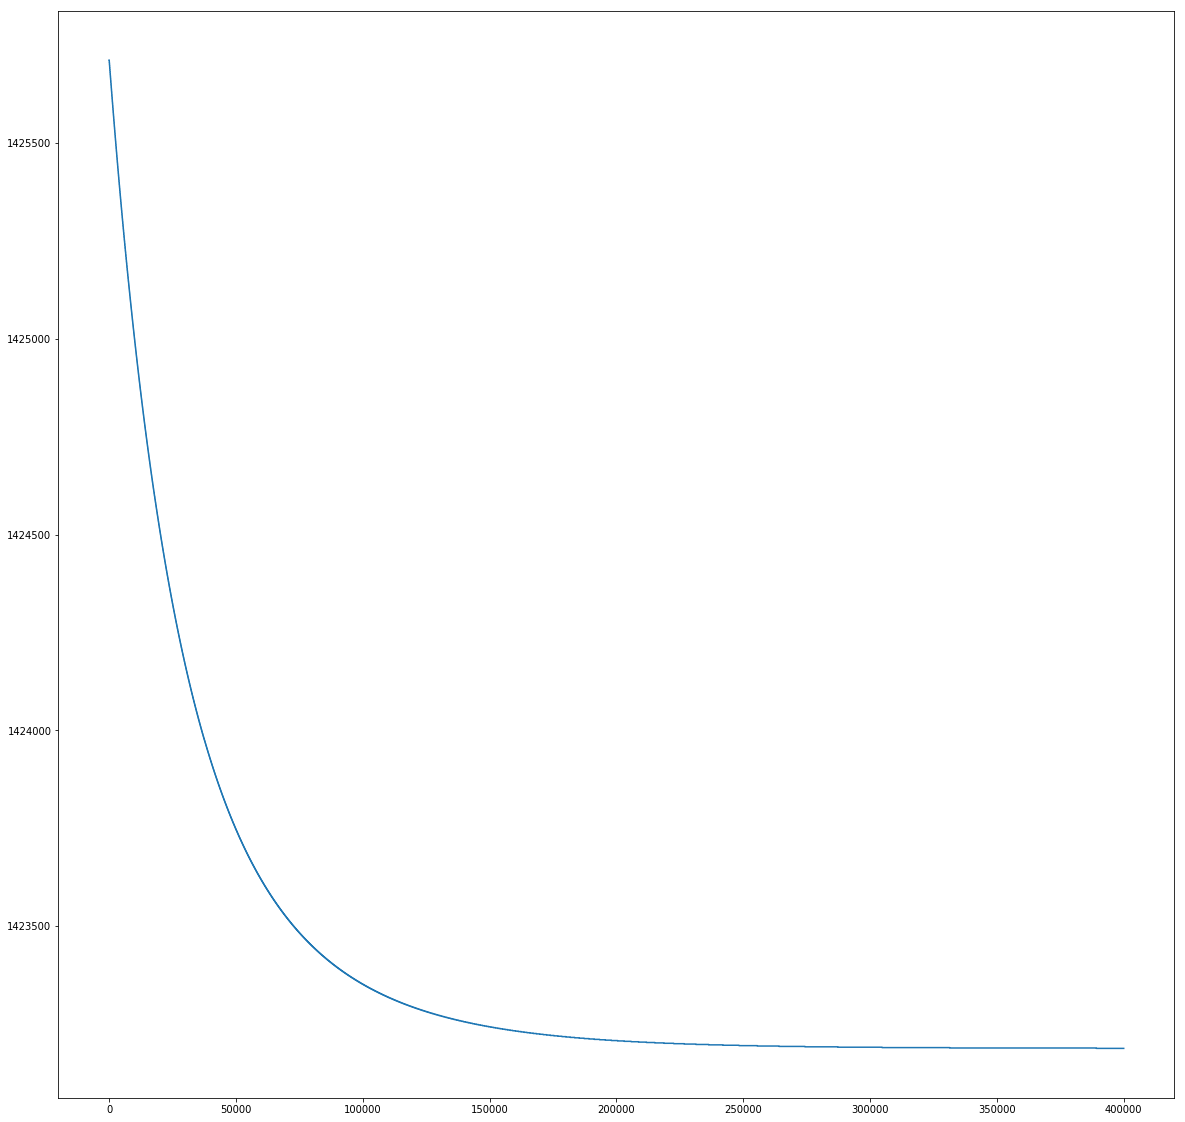

In [98]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.plot(cost[100000:500000])
print(cost[1000000])
print(cost[489184])

In [25]:
theta

array([[ 4.20011200e+03],
       [-5.33563191e+02],
       [ 5.14681793e+01],
       [ 3.83810385e+03],
       [ 8.61882213e+01],
       [-5.41955405e+02],
       [-1.05850829e+03],
       [ 1.29813075e+03],
       [ 1.27838007e+03],
       [ 9.77445337e+02],
       [ 1.53119020e+03],
       [ 2.10672282e+03],
       [ 3.07428537e+03],
       [ 4.15331958e+03],
       [-2.38455376e+03],
       [-1.95622546e+03],
       [ 5.33930967e+02],
       [ 1.00000000e+00],
       [ 7.05484805e+03],
       [-4.70349776e+02],
       [ 4.84636210e+03],
       [-4.78515987e+03],
       [-1.93107908e+03],
       [-1.95037442e+03],
       [-1.87712903e+03],
       [-2.69501201e+03],
       [ 4.32808079e+03],
       [ 1.95985116e+03],
       [-1.17962128e+03],
       [-1.72313684e+03],
       [-3.95405632e+02],
       [-2.49024169e+03],
       [ 3.21877013e+03],
       [ 9.82341865e+02],
       [ 8.19584887e+02],
       [ 3.38152711e+03],
       [ 2.19341945e+03],
       [ 2.00769255e+03],
       [ 3.9

In [99]:
ret = x_test.dot(theta).iloc[:,0]
ret -= y_test
ret.describe()


count      58.000000
mean      431.811198
std      1896.558528
min     -3104.110861
25%      -854.663646
50%       143.636689
75%      1475.441006
max      5757.420958
Name: 0, dtype: float64

In [360]:
type(theta)

numpy.ndarray

In [26]:
save_theta = pd.DataFrame(theta)
save_theta.to_csv(os.path.join(os.getcwd(),'Datas','theta_2M.csv'),index=False)